# Premier League Football Betting Odds

#### Author: Petar Sarajcev, PhD; University of Split, FESB, Croatia. (petar.sarajcev@fesb.hr)

### Analysis of 2016 - 2017 Premier League Football Season using Hierarchical Bayesian Models

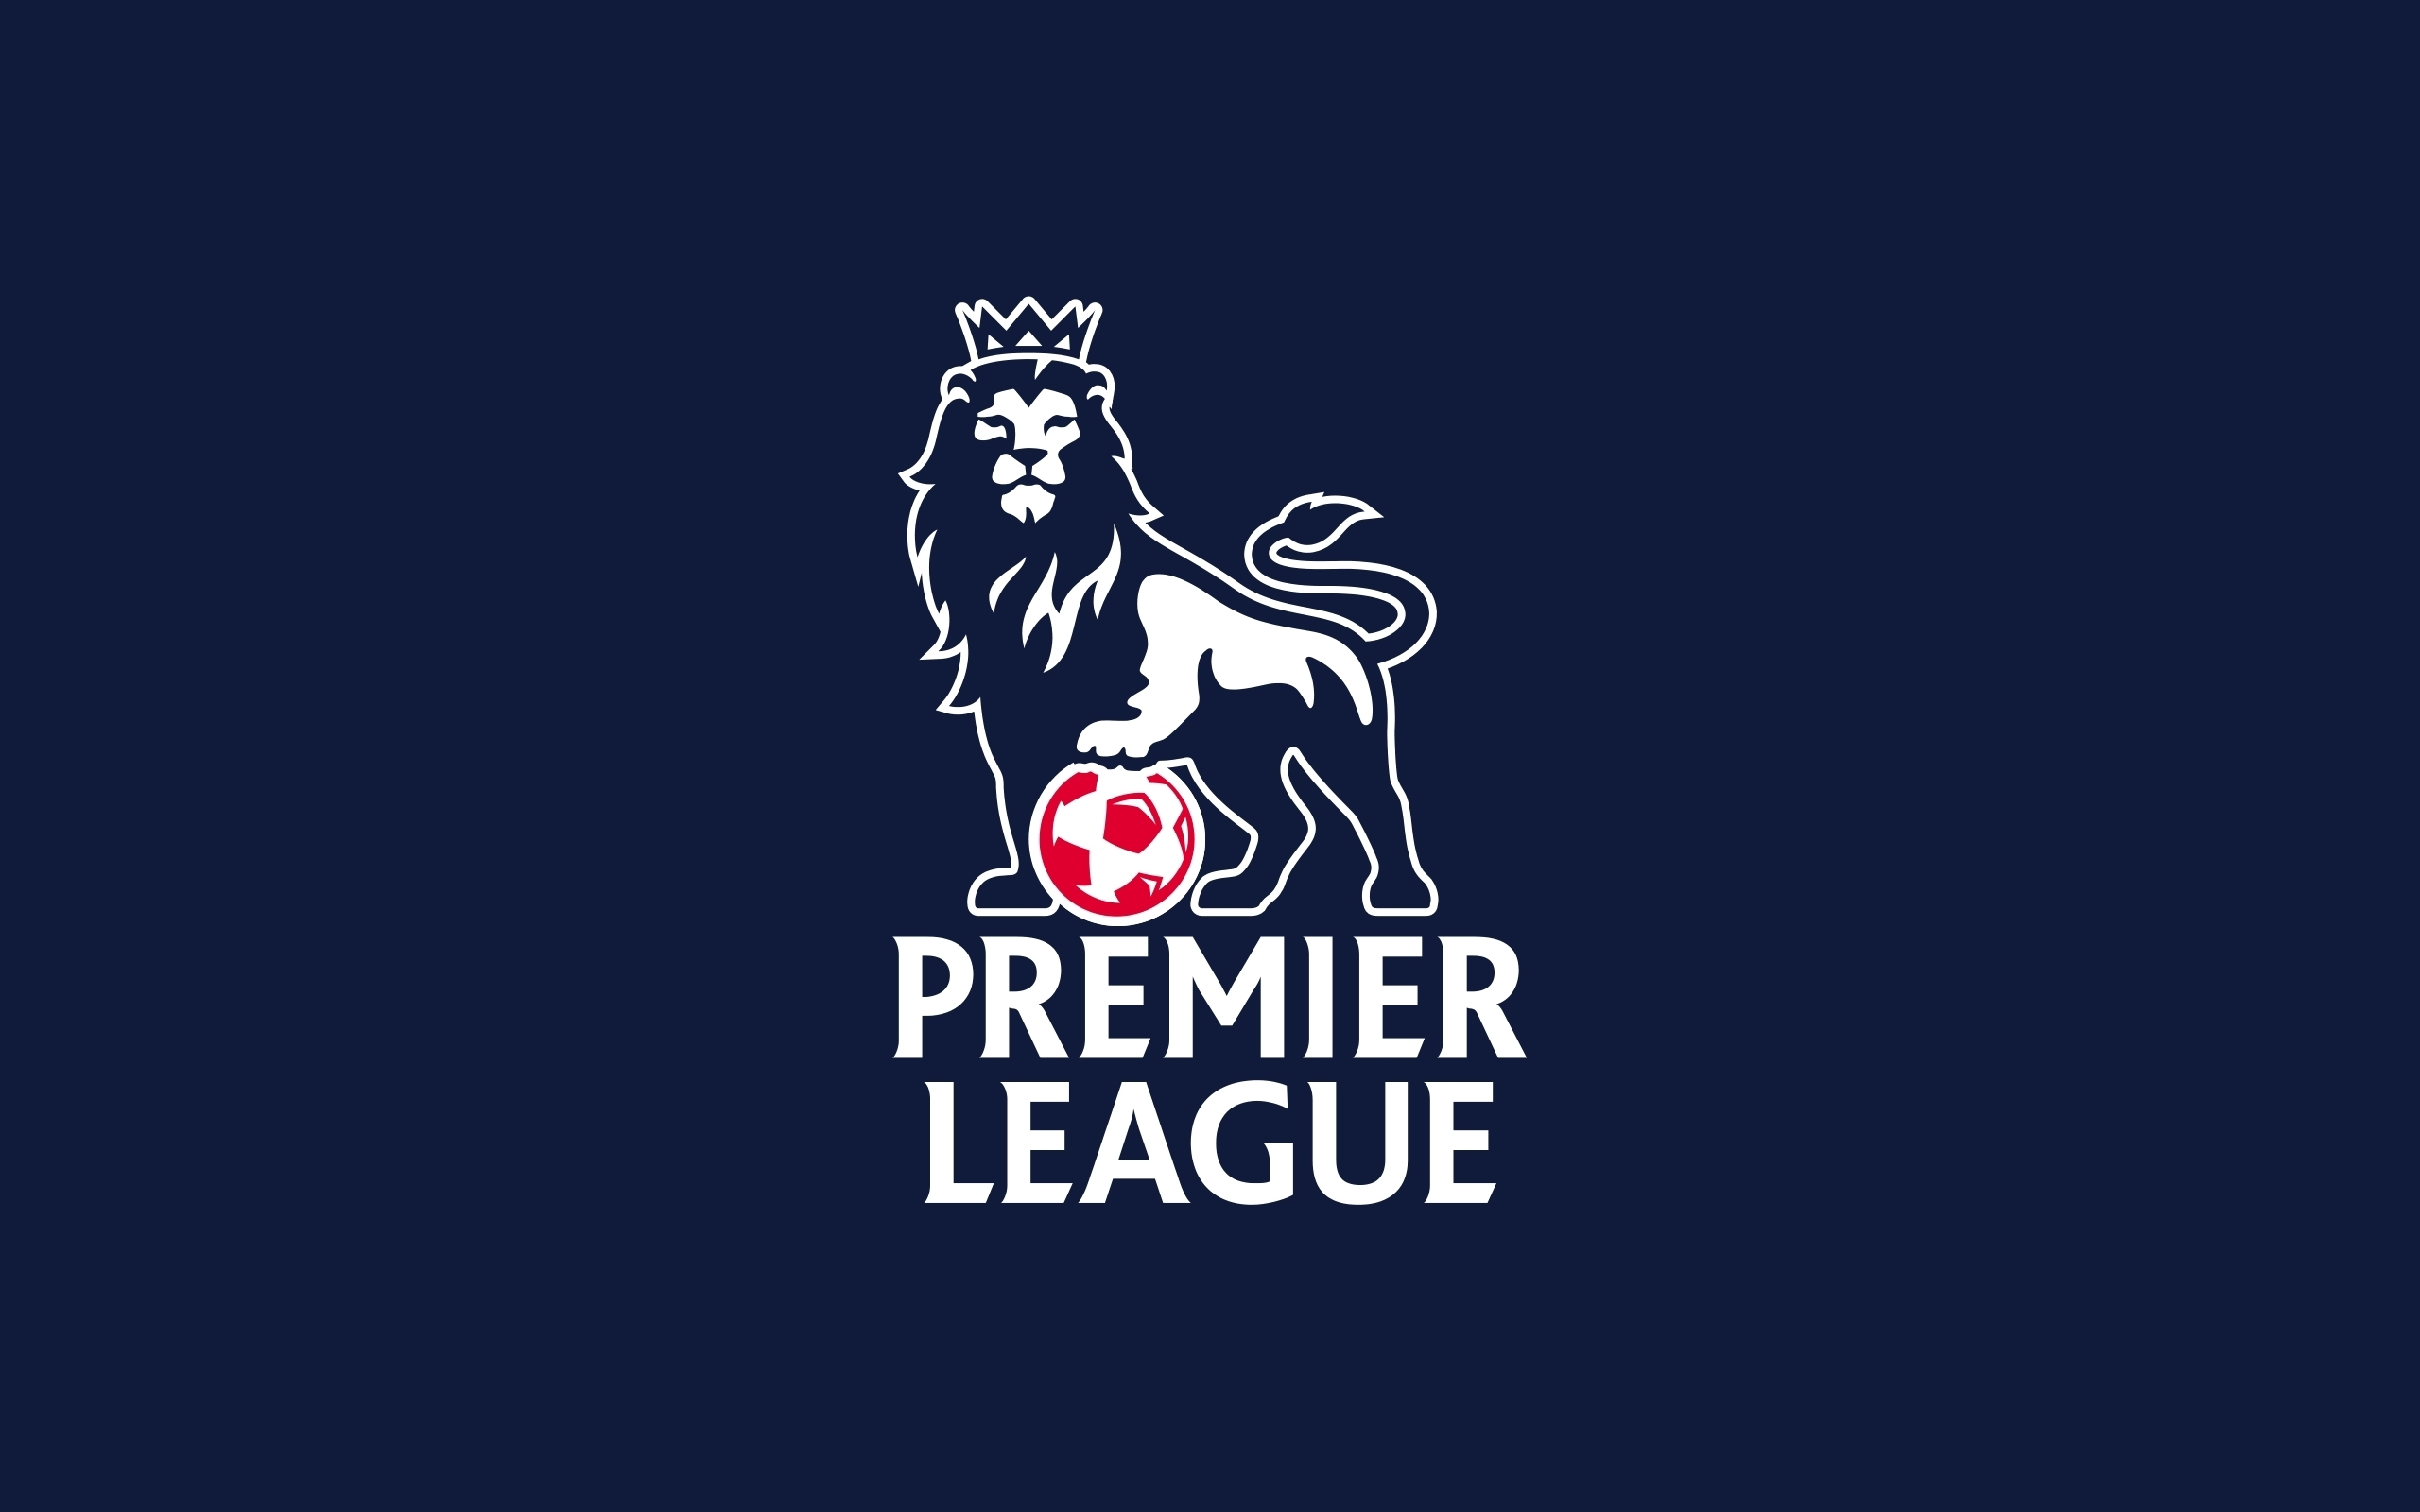

In [89]:
Image(filename='premier_league_logo.jpeg', width=800, height=500)

This post is heavily influenced and reuses code from the following blog post:

http://danielweitzenfeld.github.io/passtheroc/blog/2014/10/28/bayes-premier-league/

Hierarchical Bayesian Model is based on the following paper:

http://docs.pymc.io/notebooks/www.statistica.it/gianluca/Research/BaioBlangiardo.pdf

In [1]:
from __future__ import print_function

In [87]:
from IPython.display import Image

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm

import theano.tensor as tt
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans

In [4]:
%matplotlib inline

In [5]:
sns.set(context='notebook', style='darkgrid', font_scale=1.2)

Premier League data for the 2016 - 2017 season is awailable here:

https://en.wikipedia.org/wiki/2016–17_Premier_League

### 2016 - 2017 Premier League Season data

In [6]:
data = pd.read_csv('premier_2016-17.csv', sep='\t', index_col=0, encoding='utf-8')
data

,ARS,BOU,BUR,CHE,CRY,EVE,HUL,LEI,LIV,MCI,MUN,MID,SOU,STK,SUN,SWA,TOT,WAT,WBA,WHU
Home \ Away,,,,,,,,,,,,,,,,,,,,
Arsenal,—,3–1,2–1,3–0,2–0,3–1,2–0,1–0,3–4,2–2,2–0,0–0,2–1,3–1,2–0,3–2,1–1,1–2,1–0,3–0
Bournemouth,3–3,—,2–1,1–3,0–2,1–0,6–1,1–0,4–3,0–2,1–3,4–0,1–3,2–2,1–2,2–0,0–0,2–2,1–0,3–2
Burnley,0–1,3–2,—,1–1,3–2,2–1,1–1,1–0,2–0,1–2,0–2,1–0,1–0,1–0,4–1,0–1,0–2,2–0,2–2,1–2
Chelsea,3–1,3–0,3–0,—,1–2,5–0,2–0,3–0,1–2,2–1,4–0,3–0,4–2,4–2,5–1,3–1,2–1,4–3,1–0,2–1
Crystal Palace,3–0,1–1,0–2,0–1,—,0–1,4–0,2–2,2–4,1–2,1–2,1–0,3–0,4–1,0–4,1–2,0–1,1–0,0–1,0–1
Everton,2–1,6–3,3–1,0–3,1–1,—,4–0,4–2,0–1,4–0,1–1,3–1,3–0,1–0,2–0,1–1,1–1,1–0,3–0,2–0
Hull City,1–4,3–1,1–1,0–2,3–3,2–2,—,2–1,2–0,0–3,0–1,4–2,2–1,0–2,0–2,2–1,1–7,2–0,1–1,2–1
Leicester City,0–0,1–1,3–0,0–3,3–1,0–2,3–1,—,3–1,4–2,0–3,2–2,0–0,2–0,2–0,2–1,1–6,3–0,1–2,1–0
Liverpool,3–1,2–2,2–1,1–1,1–2,3–1,5–1,4–1,—,1–0,0–0,3–0,0–0,4–1,2–0,2–3,2–0,6–1,2–1,2–2


In [7]:
data.iloc[0,1]

u'3\u20131'

In [8]:
rows = []
for i in range(len(data.index)):
    for j in range(len(data.columns)):
        if i == j:
            continue
        cell = data.iloc[i,j]
        score = [int(k) for k in cell.split(u'\u2013')]
        rows.append([data.columns[i], data.columns[j], score[0], score[1]])
df = pd.DataFrame(rows, columns=['home', 'away', 'home_s', 'away_s'])

There are twenty (20) teams playing in the 2016 - 2017 Premier League season, as follows:

In [9]:
teams = data.columns.values
teams = pd.DataFrame(teams, columns=['team'])
teams['name'] = data.index
teams['i'] = teams.index
teams

,team,name,i
0,ARS,Arsenal,0
1,BOU,Bournemouth,1
2,BUR,Burnley,2
3,CHE,Chelsea,3
4,CRY,Crystal Palace,4
5,EVE,Everton,5
6,HUL,Hull City,6
7,LEI,Leicester City,7
8,LIV,Liverpool,8
9,MCI,Manchester City,9


In [10]:
# make a copy at this point for further reference
teams_freeze = teams.copy()

In [11]:
df = pd.merge(df, teams, left_on='home', right_on='team', how='left')
df = df.rename(columns={'i':'home_i'})
df = df.drop(labels=['team', 'name'], axis=1)
df = pd.merge(df, teams, left_on='away', right_on='team', how='left')
df = df.rename(columns={'i':'away_i'})
df = df.drop(labels=['team', 'name'], axis=1)

In [12]:
# make a copy at this point for further reference
df_freeze = df.copy()

In [13]:
def home_outcome(home, away):
    if home > away:
        outcome = 'win'
    elif home < away:
        outcome = 'loss'
    else:
        outcome = 'draw'
    return outcome

def away_outcome(home, away):
    if home < away:
        outcome = 'win'
    elif home > away:
        outcome = 'loss'
    else:
        outcome = 'draw'
    return outcome    

In [14]:
df['home_outcome'] = df.apply(lambda x: home_outcome(x['home_s'], x['away_s']), axis=1)
df['away_outcome'] = df.apply(lambda x: away_outcome(x['home_s'], x['away_s']), axis=1)
df = df.join(pd.get_dummies(df['home_outcome'], prefix='home'))
df = df.join(pd.get_dummies(df['away_outcome'], prefix='away'))

In [15]:
df.head()

,home,away,home_s,away_s,home_i,away_i,home_outcome,away_outcome,home_draw,home_loss,home_win,away_draw,away_loss,away_win
0,ARS,BOU,3,1,0,1,win,loss,0,0,1,0,1,0
1,ARS,BUR,2,1,0,2,win,loss,0,0,1,0,1,0
2,ARS,CHE,3,0,0,3,win,loss,0,0,1,0,1,0
3,ARS,CRY,2,0,0,4,win,loss,0,0,1,0,1,0
4,ARS,EVE,3,1,0,5,win,loss,0,0,1,0,1,0


In [16]:
def season_table(season, teams):
    g = season.groupby('home_i')
    home = pd.DataFrame({'home_goals':g['home_s'].sum(),
                         'home_goals_against':g['away_s'].sum(),
                         'home_wins':g['home_win'].sum(),
                         'home_draws':g['home_draw'].sum(),
                         'home_losses':g['home_loss'].sum()})
    g = season.groupby('away_i')
    away = pd.DataFrame({'away_goals':g['away_s'].sum(),
                         'away_goals_against':g['home_s'].sum(),
                         'away_wins':g['away_win'].sum(),
                         'away_draws':g['away_draw'].sum(),
                         'away_losses':g['away_loss'].sum()})
    df = home.join(away)
    df['W'] = df['home_wins'] + df['away_wins']
    df['D'] = df['home_draws'] + df['away_draws']
    df['L'] = df['home_losses'] + df['away_losses']
    df['Pts'] = df['W']*3 + df['D']
    df['GF'] = df['home_goals'] + df['away_goals']
    df['GA'] = df['home_goals_against'] + df['away_goals_against']
    df['GD'] = df['GF'] - df['GA']
    df = pd.merge(teams, df, left_on='i', right_index=True)
    df = df.sort_values(by=['Pts', 'GD'], ascending=False).reset_index()
    df['Pos'] = df.index.values + 1
    df['Pld'] = len(df['team']) + len(df['team']) - 2
    table = df[['Pos', 'name', 'team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts']]
    return table

### 2016 - 2017 Season Table

In [17]:
premier_league = season_table(df, teams)
premier_league

,Pos,name,team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Chelsea,CHE,38,30,3,5,85,33,52,93
1,2,Tottenham Hotspur,TOT,38,26,8,4,86,26,60,86
2,3,Manchester City,MCI,38,23,9,6,80,39,41,78
3,4,Liverpool,LIV,38,22,10,6,78,42,36,76
4,5,Arsenal,ARS,38,23,6,9,77,44,33,75
5,6,Manchester United,MUN,38,18,15,5,54,29,25,69
6,7,Everton,EVE,38,17,10,11,62,44,18,61
7,8,Southampton,SOU,38,12,10,16,41,48,-7,46
8,9,Bournemouth,BOU,38,12,10,16,55,67,-12,46
9,10,West Bromwich Albion,WBA,38,12,9,17,43,51,-8,45


In [18]:
obs_home_gols = df['home_s'].values
obs_away_gols = df['away_s'].values
home_team = df['home_i'].values
away_team = df['away_i'].values
num_teams = len(teams['i'].values)
num_games = len(df.index)

### Hierarchical Bayesian Model

In [20]:
with pm.Model() as model:
    # Hyper-parameters
    home = pm.Normal('home', mu=0., tau=0.0001)
    mu_att = pm.Normal('mu_att', mu=0., tau=0.0001)
    mu_def = pm.Normal('mu_def', mu=0., tau=0.0001)
    tau_att = pm.Gamma('tau_att', alpha=0.01, beta=0.01)
    tau_def = pm.Gamma('tau_def', alpha=0.01, beta=0.01)
    intercept = pm.Normal('intercept', mu=0., tau=0.0001)
    # Team-specific model parameters
    atts_star = pm.Normal("atts_star", mu=mu_att, tau=tau_att, shape=num_teams)
    defs_star = pm.Normal("defs_star", mu=mu_def, tau=tau_def, shape=num_teams)
    # Reparameterization
    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    # Model
    home_theta = tt.exp(intercept + home + atts[home_team] + defs[away_team])
    away_theta = tt.exp(intercept + atts[away_team] + defs[home_team])
    # Likelihood of observed data
    home_points = pm.Poisson('home_points', mu=home_theta, observed=obs_home_gols)
    away_points = pm.Poisson('away_points', mu=away_theta, observed=obs_away_gols)
    # MCMC
    chain = pm.sample(2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 2997/3000 [03:44<00:00, 13.35it/s]/home/ps/anaconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.667414564125, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/home/ps/anaconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 86 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3000/3000 [03:44<00:00, 13.36it/s]


In [21]:
trace = chain  # use all samples

In [22]:
var_names = ['home', 'intercept', 'atts', 'defs']

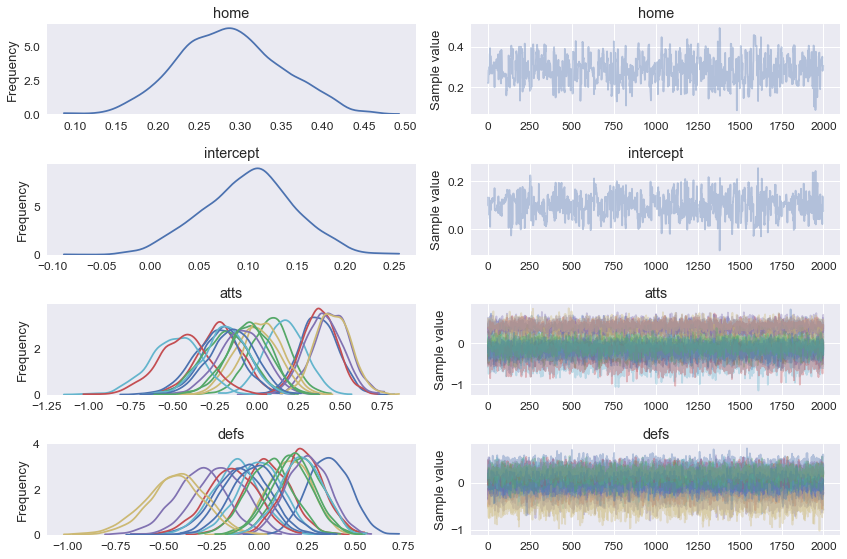

In [23]:
pm.traceplot(trace, varnames=var_names);

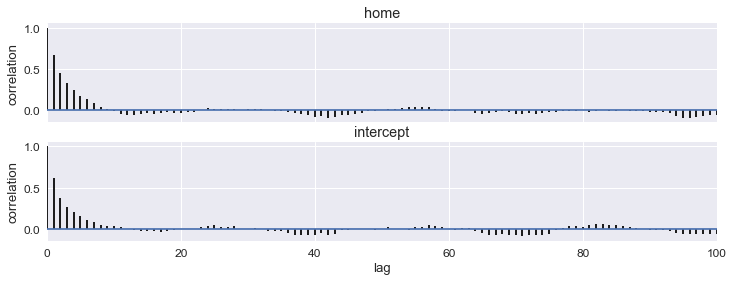

In [28]:
pm.autocorrplot(trace, varnames=var_names[0:2]);

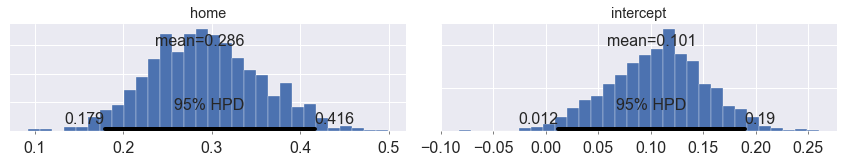

In [29]:
pm.plot_posterior(trace, varnames=['home', 'intercept']);

In [44]:
x_vals = trace['atts'].mean(axis=0)
y_vals = trace['defs'].mean(axis=0)

The model determines the **quality** of each team using its **attack effect** and its **defense effect**, which are defined on a scale ranging between -1 and 1. 

A team with strong attacking capability has positive attack effect, while a team with weak attacking capability has negative attack effect. At the same time, a team with strong defending capability has negative defense effect, while a team with the poor defensive capability has positive defense effect.

This means that the teams with the strong attack and strong defense will be in the lower right quadrant of the graph, while teams with weak attack and defense will be in the upper left quadrant.

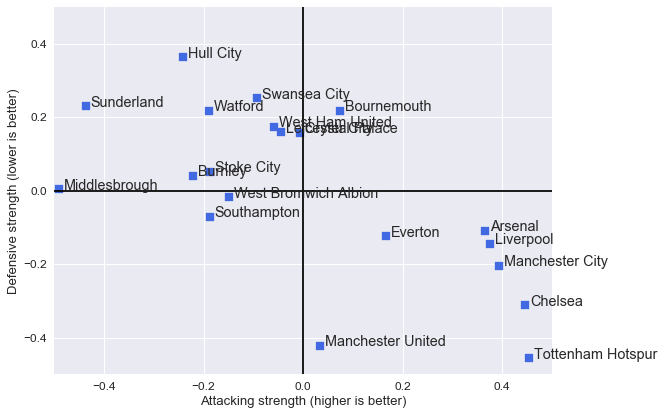

In [45]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals, marker='s', s=50, c='royalblue')
for label, x, y in zip(teams['name'].values, x_vals, y_vals):
    ax.annotate(label, xy=(x,y), xytext=(x+0.01,y))
ax.set_xlabel('Attacking strength (higher is better)')
ax.set_ylabel('Defensive strength (lower is better)')
ax.set_xlim(-0.5, 0.5)
ax.hlines(0, *ax.get_xlim())
ax.set_ylim(-0.5, 0.5)
ax.vlines(0, *ax.get_ylim())
plt.tight_layout()
plt.show()

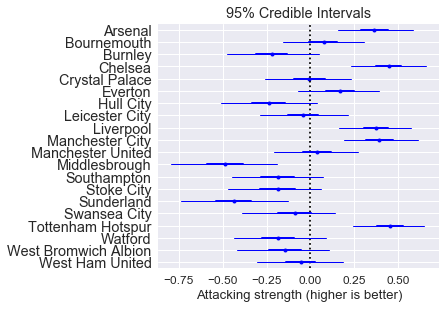

In [30]:
pm.forestplot(trace, varnames=['atts'], ylabels=teams['name'].values, 
              xtitle='Attacking strength (higher is better)');

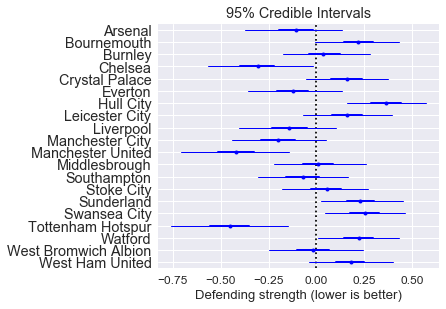

In [31]:
pm.forestplot(trace, varnames=['defs'], ylabels=teams['name'].values, 
              xtitle='Defending strength (lower is better)');

In [32]:
att_hpd = pm.hpd(trace['atts'])
def_hpd = pm.hpd(trace['defs'])

Teams with strong attacking strength will have bars above the zero, while teams with weak attacking strength will have bars below the zero. The longer the bar is, the more pronounced is the effect.

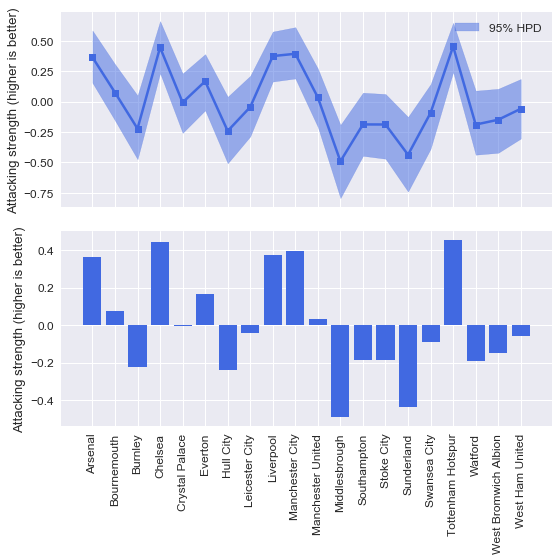

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,8))
ax[0].plot(teams['name'].values, x_vals, ls='-', c='royalblue', lw=2.5, marker='s')
ax[0].fill_between(teams['name'].values, att_hpd[:,0], att_hpd[:,1], 
                color='royalblue', alpha=0.5, label='95% HPD')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('Attacking strength (higher is better)')
ax[1].bar(teams['name'].values, x_vals, color='royalblue')
ax[1].set_ylabel('Attacking strength (higher is better)')
ax[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

Teams with strong defensive strength will have bars below the zero, while teams with weak defensive strength will have bars above the zero. The longer the bar is, the more pronounced is the effect.

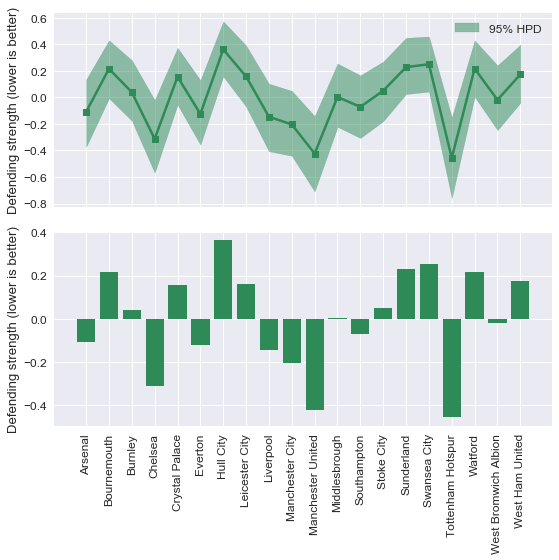

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,8))
ax[0].plot(teams['name'].values, y_vals, ls='-', c='seagreen', lw=2.5, marker='s')
ax[0].fill_between(teams['name'].values, def_hpd[:,0], def_hpd[:,1], 
                color='seagreen', alpha=0.5, label='95% HPD')
ax[0].legend(loc='upper right')
ax[0].set_ylabel('Defending strength (lower is better)')
ax[1].bar(teams['name'].values, y_vals, color='seagreen')
ax[1].set_ylabel('Defending strength (lower is better)')
ax[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

### Hierarchical Bayesian Model with two groups

In [35]:
with pm.Model() as model:
    # Hyper-parameters
    home = pm.Normal('home', mu=0., tau=0.0001)
    tau_att = pm.Gamma('tau_att', alpha=0.1, beta=0.1, shape=2)
    tau_def = pm.Gamma('tau_def', alpha=0.1, beta=0.1, shape=2)
    BoundedNormalLow = pm.Bound(pm.Normal, lower=-3., upper=0.)
    BoundedNormalHig = pm.Bound(pm.Normal, lower=0., upper=3.)
    mu_att1 = BoundedNormalHig('mu_att1', mu=0., tau=0.001)  # TOP 
    mu_def1 = BoundedNormalLow('mu_def1', mu=0., tau=0.001)  # TEAMS
    mu_att2 = pm.Normal('mu_att2', mu=0., tau=0.0001)  # THE
    mu_def2 = pm.Normal('mu_def2', mu=0., tau=0.0001)  # REST
    grp = pm.Categorical('grp', p=np.asarray([0.5, 0.5]), shape=num_teams)
    mu_att = pm.Deterministic('mu_att', tt.as_tensor_variable([mu_att1, mu_att2]))
    mu_def = pm.Deterministic('mu_def', tt.as_tensor_variable([mu_def1, mu_def2]))  
    nu_att = pm.Exponential('nu_att', lam=1./30.)
    nu_def = pm.Exponential('nu_def', lam=1./30.)
    # Team-specific model parameters
    atts_star = pm.StudentT("atts_star", nu=nu_att, mu=mu_att[grp], sd=1./tau_att[grp], shape=num_teams)
    defs_star = pm.StudentT("defs_star", nu=nu_def, mu=mu_def[grp], sd=1./tau_def[grp], shape=num_teams)
    # Reparameterization
    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    # Model
    home_theta = tt.exp(home + atts[home_team] + defs[away_team])
    away_theta = tt.exp(atts[away_team] + defs[home_team])
    # Likelihoods of the observed data
    home_points = pm.Poisson('home_points', mu=home_theta, observed=obs_home_gols)
    away_points = pm.Poisson('away_points', mu=away_theta, observed=obs_away_gols)
    # MCMC
    chain = pm.sample(draws=4000, tune=2000)

Assigned NUTS to home
Assigned NUTS to tau_att_log__
Assigned NUTS to tau_def_log__
Assigned NUTS to mu_att1_interval__
Assigned NUTS to mu_def1_interval__
Assigned NUTS to mu_att2
Assigned NUTS to mu_def2
Assigned BinaryGibbsMetropolis to grp
Assigned NUTS to nu_att_log__
Assigned NUTS to nu_def_log__
Assigned NUTS to atts_star
Assigned NUTS to defs_star
100%|█████████▉| 5999/6000 [03:03<00:00, 32.76it/s]/home/ps/anaconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.694009147656, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 6000/6000 [03:03<00:00, 32.76it/s]


In [36]:
trace2 = chain[::2]  # thinning

In [37]:
var_names2 = ['grp', 'atts', 'defs']

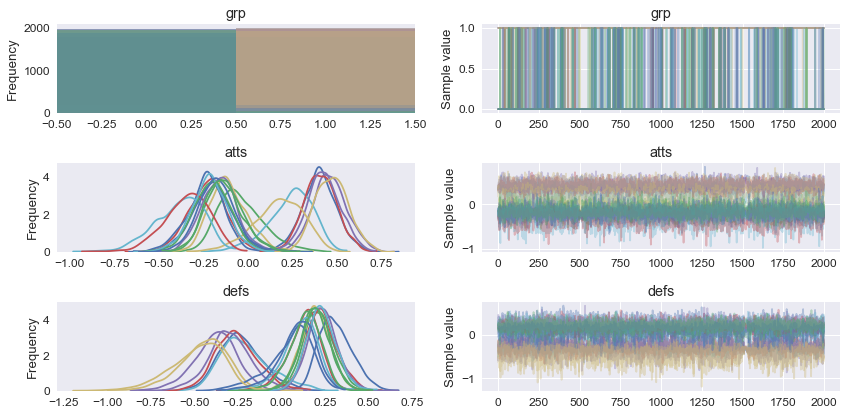

In [38]:
pm.traceplot(trace2, varnames=var_names2);

In [39]:
pos = trace2['grp'].mean(axis=0)
pos = np.asarray([1 if x > 0.5 else 0 for x in pos])
n = teams['name'].values
n[np.argwhere(pos==0)]

array([[u'Bournemouth'],
       [u'Burnley'],
       [u'Crystal Palace'],
       [u'Hull City'],
       [u'Leicester City'],
       [u'Middlesbrough'],
       [u'Southampton'],
       [u'Stoke City'],
       [u'Sunderland'],
       [u'Swansea City'],
       [u'Watford'],
       [u'West Bromwich Albion'],
       [u'West Ham United']], dtype=object)

These are the **top teams** from the 2016 - 2017 Premier League Season. It can be seen that these are actually top teams from the season table.

In [40]:
n[np.argwhere(pos==1)]

array([[u'Arsenal'],
       [u'Chelsea'],
       [u'Everton'],
       [u'Liverpool'],
       [u'Manchester City'],
       [u'Manchester United'],
       [u'Tottenham Hotspur']], dtype=object)

In [46]:
x_vals = trace2['atts'].mean(axis=0)
y_vals = trace2['defs'].mean(axis=0)

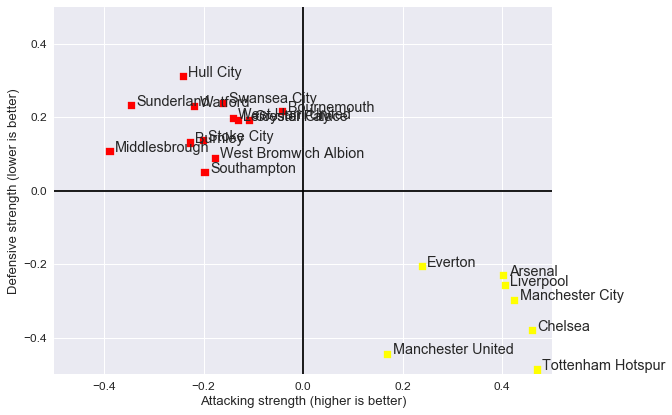

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_vals, y_vals, marker='s', s=50, c=pos, cmap=plt.cm.autumn)
for label, x, y in zip(teams['name'].values, x_vals, y_vals):
    ax.annotate(label, xy=(x,y), xytext=(x+0.01,y))
ax.set_xlabel('Attacking strength (higher is better)')
ax.set_ylabel('Defensive strength (lower is better)')
ax.set_xlim(-0.5, 0.5)
ax.hlines(0, *ax.get_xlim())
ax.set_ylim(-0.5, 0.5)
ax.vlines(0, *ax.get_ylim())
plt.tight_layout()
plt.show()

In [47]:
X = np.c_[x_vals, y_vals]

In [48]:
# Compute clustering with KMeans
model = KMeans(n_clusters=2)  # No. of clusters as input
model.fit(X)
cluster_centers = model.cluster_centers_       
labels = model.labels_

Two different clusters of teams are clearly identifiable:

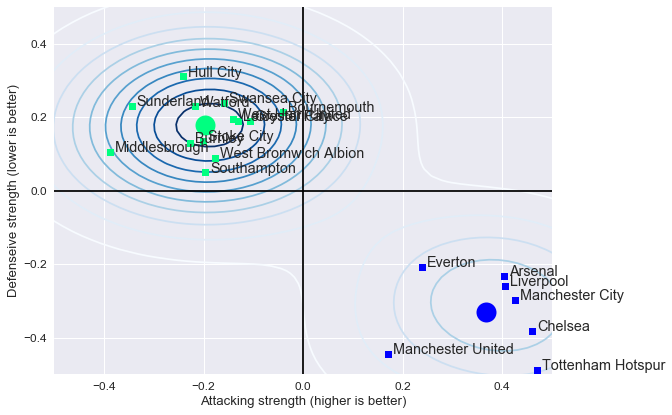

In [50]:
n_clusters = 2
fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(x_vals, y_vals, shade=False, shade_lowest=False, cmap=plt.cm.get_cmap('Blues'), ax=ax)       
for label, x, y in zip(teams['name'].values, x_vals, y_vals):
    ax.annotate(label, xy=(x,y), xytext=(x+0.01,y))
colors = plt.cm.winter(np.linspace(0, 1, n_clusters))  # generate colours
if n_clusters > 0:
    for k, col in zip(range(n_clusters), colors):
        # Cluster centers
        cluster_center = cluster_centers[k]
        ax.plot(cluster_center[0], cluster_center[1], marker='o', markerfacecolor=col,
                markeredgecolor='black', markersize=20, label='cluster center')
        # Cluster members
        members = (labels == k)
        ax.plot(X[members, 0], X[members, 1], ls='', marker='s', c=col)
#ax.legend(loc='upper right')
ax.set_xlabel('Attacking strength (higher is better)')
ax.set_ylabel('Defenseive strength (lower is better)')
ax.set_xlim(-0.5, 0.5)
ax.hlines(0, *ax.get_xlim())
ax.set_ylim(-0.5, 0.5)
ax.vlines(0, *ax.get_ylim())
plt.tight_layout()
plt.show()

### Simulate a season using the model

In [51]:
def simulate_one_season(trace, df):
    num_samples = trace['defs'].shape[0]
    # Draw a single set of parameters from the trace
    draw = np.random.randint(0, num_samples)
    intercept = trace['intercept'][draw]
    home = trace['home'][draw]
    atts = trace['atts'][draw]
    atts_draw = pd.DataFrame({'att':atts})
    defs = trace['defs'][draw]
    defs_draw = pd.DataFrame({'def':defs})
    
    season = df.copy()
    season = pd.merge(season, atts_draw, left_on='home_i', right_index=True)
    season = pd.merge(season, defs_draw, left_on='home_i', right_index=True)
    season = season.rename(columns = {'att': 'att_home', 'def': 'def_home'})
    season = pd.merge(season, atts_draw, left_on='away_i', right_index=True)
    season = pd.merge(season, defs_draw, left_on='away_i', right_index=True)
    season = season.rename(columns = {'att': 'att_away', 'def': 'def_away'})
    season['home_val'] = home
    season['intercept'] = intercept
    season['home_theta'] = season.apply(lambda x: np.exp(x['intercept'] + x['home_val'] + 
                                                         x['att_home'] + x['def_away']), axis=1)
    season['away_theta'] = season.apply(lambda x: np.exp(x['intercept'] + 
                                                         x['att_away'] + x['def_home']), axis=1)
    season['home_goals'] = season.apply(lambda x: np.random.poisson(x['home_theta']), axis=1)
    season['away_goals'] = season.apply(lambda x: np.random.poisson(x['away_theta']), axis=1)
    season['home_outcome'] = season.apply(lambda x: home_outcome(x['home_goals'], x['away_goals']), axis=1)
    season['away_outcome'] = season.apply(lambda x: away_outcome(x['home_goals'], x['away_goals']), axis=1)
    season = season.join(pd.get_dummies(season['home_outcome'], prefix='home'))
    season = season.join(pd.get_dummies(season['away_outcome'], prefix='away'))
    return season

In [52]:
season = simulate_one_season(trace, df_freeze)  # using "df_freeze" dataframe as a starting point

In [53]:
season.head()

,home,away,home_s,away_s,home_i,away_i,att_home,def_home,att_away,def_away,...,home_goals,away_goals,home_outcome,away_outcome,home_draw,home_loss,home_win,away_draw,away_loss,away_win
0,ARS,BOU,3,1,0,1,0.424045,-0.156352,0.120707,0.298744,...,4,0,win,loss,0,0,1,0,1,0
39,BUR,BOU,3,2,2,1,-0.136712,0.173078,0.120707,0.298744,...,2,1,win,loss,0,0,1,0,1,0
58,CHE,BOU,3,0,3,1,0.426151,-0.300039,0.120707,0.298744,...,1,0,win,loss,0,0,1,0,1,0
77,CRY,BOU,1,1,4,1,0.154771,-0.037346,0.120707,0.298744,...,1,4,loss,win,0,1,0,0,0,1
96,EVE,BOU,6,3,5,1,0.393669,-0.262406,0.120707,0.298744,...,3,0,win,loss,0,0,1,0,1,0


In [54]:
def create_season_table(season, teams):
    g = season.groupby('home_i')
    home = pd.DataFrame({'home_goals':g['home_goals'].sum(),
                         'home_goals_against':g['away_goals'].sum(),
                         'home_wins':g['home_win'].sum(),
                         'home_draws':g['home_draw'].sum(),
                         'home_losses':g['home_loss'].sum()})
    g = season.groupby('away_i')
    away = pd.DataFrame({'away_goals':g['away_goals'].sum(),
                         'away_goals_against':g['home_goals'].sum(),
                         'away_wins':g['away_win'].sum(),
                         'away_draws':g['away_draw'].sum(),
                         'away_losses':g['away_loss'].sum()})
    df = home.join(away)
    df['W'] = df['home_wins'] + df['away_wins']
    df['D'] = df['home_draws'] + df['away_draws']
    df['L'] = df['home_losses'] + df['away_losses']
    df['Pts'] = df['W']*3 + df['D']
    df['GF'] = df['home_goals'] + df['away_goals']
    df['GA'] = df['home_goals_against'] + df['away_goals_against']
    df['GD'] = df['GF'] - df['GA']
    df = pd.merge(teams, df, left_on='i', right_index=True)
    df = df.sort_values(by=['Pts', 'GD'], ascending=False).reset_index()
    df['CL'] = (df.index < 4).astype(int)
    df['C'] = (df.index == 0).astype(int)
    table = df[['name', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'C', 'CL']]
    return table

#### Simulated season table (example)

In [55]:
table = create_season_table(season, teams_freeze)
table

,name,W,D,L,GF,GA,GD,Pts,C,CL
0,Manchester City,26,5,7,81,30,51,83,1,1
1,Everton,23,10,5,77,27,50,79,0,1
2,Tottenham Hotspur,21,10,7,85,44,41,73,0,1
3,Manchester United,21,9,8,61,39,22,72,0,1
4,Chelsea,19,9,10,68,45,23,66,0,0
5,Arsenal,18,12,8,65,52,13,66,0,0
6,Liverpool,17,8,13,52,44,8,59,0,0
7,West Bromwich Albion,15,12,11,51,42,9,57,0,0
8,Crystal Palace,14,10,14,60,51,9,52,0,0
9,West Ham United,13,11,14,48,55,-7,50,0,0


### Simulate many seasons from the model

In [56]:
def simulate_seasons(trace, df, teams, n=100):
    dfs = []
    for i in range(n):
        s = simulate_one_season(trace, df)
        t = create_season_table(s, teams)
        t['iter'] = i
        dfs.append(t)
    return pd.concat(dfs, ignore_index=True)

In [57]:
sims = simulate_seasons(trace, df_freeze, teams_freeze, 200)  # simulate 200 seasons

In [ ]:
sims.head()

Let's see what is the "most probable" number of points that the e.g. **Manchester United** will score:

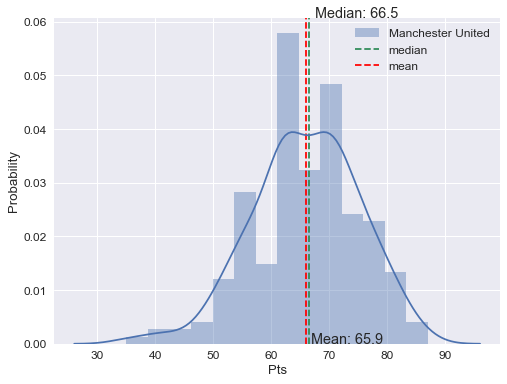

In [61]:
team_name = 'Manchester United'
points = sims['Pts'].loc[sims['name'] == team_name]
median = sims['Pts'].loc[sims['name'] == team_name].median()
mean = sims['Pts'].loc[sims['name'] == team_name].mean()
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(points, ax=ax, label=team_name)
ax.vlines(median, *ax.get_ylim(), colors='seagreen', linestyles='--', label='median')
ax.vlines(mean, *ax.get_ylim(), colors='red', linestyles='--', label='mean')
ax.annotate('Median: {:.1f}'.format(median), xy=(median+1, ax.get_ylim()[1]))
ax.annotate('Mean: {:.1f}'.format(mean), xy=(mean+1, ax.get_ylim()[0]))
ax.legend(loc='upper right')
ax.set_ylabel('Probability')
plt.show()

Let's compare the number of points that two very different teams (**Chelsea and Swansea City**) will score:

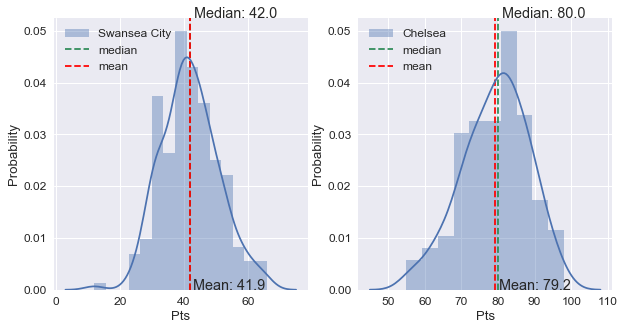

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for i, name in enumerate(['Swansea City', 'Chelsea']):
    points = sims['Pts'].loc[sims['name'] == name]
    median = sims['Pts'].loc[sims['name'] == name].median()
    mean = sims['Pts'].loc[sims['name'] == name].mean()
    sns.distplot(points, ax=ax[i], label=name)
    ax[i].vlines(median, *ax[i].get_ylim(), colors='seagreen', linestyles='--', label='median')
    ax[i].vlines(mean, *ax[i].get_ylim(), colors='red', linestyles='--', label='mean')
    ax[i].annotate('Median: {:.1f}'.format(median), xy=(median+1, ax[i].get_ylim()[1]))
    ax[i].annotate('Mean: {:.1f}'.format(mean), xy=(mean+1, ax[i].get_ylim()[0]))
    ax[i].legend(loc='upper left')
    ax[i].set_ylabel('Probability')
plt.show()

What is the probability that the **Swansea City** will score more than **60 points** in a Premier League season?

In [72]:
points = sims['Pts'].loc[sims['name'] == 'Swansea City']
swa_points = (float(len(points[points > 60.]))/float(len(points)))*100.
print('Probability of Swansea City scoring more than 60 points: {:.2f} (%)'.format(swa_points))

Probability of Swansea City scoring more than 60 points: 3.00 (%)


What is the probability that the **Chelsea** will score more than **60 points** in a Premier League season?

In [73]:
points = sims['Pts'].loc[sims['name'] == 'Chelsea']
che_points = (float(len(points[points > 60.]))/float(len(points)))*100.
print('Probability of Chelsea scoring more than 60 points: {:.2f} (%)'.format(che_points))

Probability of Chelsea scoring more than 60 points: 96.50 (%)


Obviously, Chelsea is much better team then Swansea City! This is very clear from the 2016 - 2017 Premier League Season table.

### Simulate games between teams and compute betting odds (European style)

In [76]:
# Simulate large number of games between two teams
def simulate_games(home, away, num_simul=100):
    outcome = {'win':0, 'loss':0, 'draw':0}
    for k in range(num_simul):
        s = simulate_one_season(trace, df_freeze)
        h = s[(s['home']==home) & (s['away']==away)]
        outcome['win']  += h['home_win'].values[0]
        outcome['loss'] += h['home_loss'].values[0]
        outcome['draw'] += h['home_draw'].values[0]
    for key in outcome.keys():
        outcome[key] = float(outcome[key])/num_simul
        outcome[key] = 1./outcome[key]  # odds
    return outcome

#### Chelsea vs Swansea City

In [77]:
# Chelsea is playing at home against the Swansea City 
# Chelsea has home field advantage
home_team = 'CHE'
away_team = 'SWA'
che_swa_home = simulate_games(home_team, away_team, 200)  # 200 simulated games
# Betting odds
che_swa_home

{'draw': 8.0, 'loss': 14.285714285714285, 'win': 1.2422360248447204}

In [78]:
# Chelsea is playing away at the Swansea City 
# Swansea City has home field advantage
home_team = 'SWA'
away_team = 'CHE'
che_swa_away = simulate_games(home_team, away_team, 200)  # 200 simulated games
# Betting odds
che_swa_away

{'draw': 5.0, 'loss': 1.4814814814814814, 'win': 8.0}

It can be seen from the above results that the betting coeffcient for Chelsea winning when playing at home is small. Also, betting coeffcient for Swansea City losing at home is small, although it is somewhat higher than the coefficient for Chelsea winning at home. This means that the Swansea City home advantage is lovering the betting coefficient on the Chelsea win (which should be expected).

Betting coefficient on Swansea City winning at home is lower than the betting coefficient of Swansea City winning away (8 to 14.2), which is expected, since ion the latter case Chelsea has the home field advantage.

#### Chelsea vs Arsenal

In [79]:
# Chelsea is playing at home against the Arsenal
# Chelsea has home field advantage
home_team = 'CHE'
away_team = 'ARS'
che_ars_home = simulate_games(home_team, away_team, 200)  # 200 simulated games
# Betting odds
che_ars_home

{'draw': 4.761904761904762,
 'loss': 5.555555555555555,
 'win': 1.639344262295082}

In [80]:
# Chelsea is playing away at the Arsenal
# Arsenal has home field advantage
home_team = 'ARS'
away_team = 'CHE'
che_ars_away = simulate_games(home_team, away_team, 200)  # 200 simulated games
# Betting odds
che_ars_away

{'draw': 4.545454545454546,
 'loss': 2.7777777777777777,
 'win': 2.380952380952381}

Betting coefficient on the Chealsea winning at home against Arsenal is 1.64, while the betting coefficient on the Arsenal winning at home against Chelsea is 2.38. Betting coefficient on the Chealsea winning away (at the Arsenal field) is 2.78, which gives advantage to the home team (Arsenal) winning at home game.

### Predict Premier League Champion from the simulation data

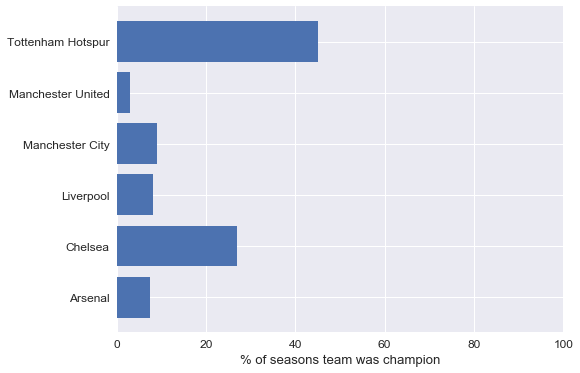

In [81]:
g = sims.groupby('name')
champs = pd.DataFrame({'perc_C':g['C'].mean()})
champs = champs.sort_values(by='perc_C', ascending=False).reset_index()
champs = champs[champs['perc_C'] > 0.005]
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(champs['name'], champs['perc_C']*100.)
ax.set_xlim(0,100)
ax.set_xlabel('% of seasons team was champion')
plt.show()

It can be seen that the *Tottenham Hotspur* has a probability of being a champion at the level of 45%.

In [82]:
champs

,name,perc_C
0,Tottenham Hotspur,0.450
1,Chelsea,0.270
2,Manchester City,0.090
3,Liverpool,0.080
4,Arsenal,0.075
5,Manchester United,0.030


### Champions League qualifiers

Compute the percent of simulated seasons each team finished in the top 4 positions which qualify it for the Champions League:

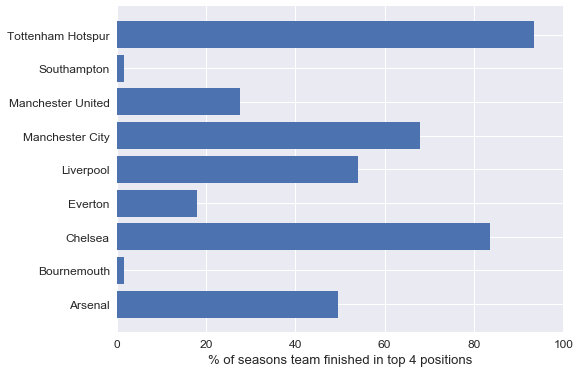

In [85]:
g = sims.groupby('name')
champs = pd.DataFrame({'perc_CL':g['CL'].mean()})
champs = champs.sort_values(by='perc_CL', ascending=False).reset_index()
champs = champs[champs['perc_CL'] > 0.01]  # only teams with more than 1%
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(champs['name'], champs['perc_CL']*100.)
ax.set_xlim(0,100)
ax.set_xlabel('% of seasons team finished in top 4 positions')
plt.show()

It can be seen that the *Tottenham Hotspur* will qualify for the Champions League with probability of 93.5%, followed by the *Chelsea* with probability of 83.5%, etc.

In [86]:
champs

,name,perc_CL
0,Tottenham Hotspur,0.935
1,Chelsea,0.835
2,Manchester City,0.680
3,Liverpool,0.540
4,Arsenal,0.495
5,Manchester United,0.275
6,Everton,0.180
7,Bournemouth,0.015
8,Southampton,0.015
